NAMA  : FENTI FERBIANTI S

NIM   : 301220046

PRODI : TEKNIK INFORMATIKA (5A)

**STUDI KASUS:** Simulasi kebiasaan penggunaan transportasi umum saat turun hujan.

**Tentukan:**
1. Matriks Transisinya!
2. Tentukan probabilitas kejadian yang akan datang untuk jangka panjang!
3. Kondisi seimbang/stabil (Steady State)

**Penyelesaian:**

Kita akan memodelkan kebiasaan seseorang dalam memilih untuk menggunakan atau tidak menggunakan transportasi umum pada hari-hari yang berbeda. Untuk itu, kita buat beberapa asumsi mengenai probabilitas transisi antara dua kondisi utama:

1. **Menggunakan Transportasi Umum (U)**: Individu memilih menggunakan transportasi umum.
2. **Tidak Menggunakan Transportasi Umum (T)**: Individu memilih untuk tidak menggunakan transportasi umum.

**Probabilitas Transisi :**
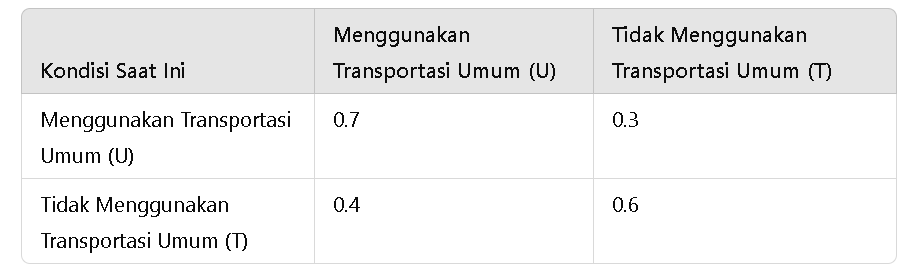

Dari matriks ini, dapat diartikan bahwa jika seseorang menggunakan transportasi umum hari ini, ada kemungkinan 70% bahwa ia akan menggunakan transportasi umum lagi esok harinya, dan 30% kemungkinan ia tidak akan menggunakannya. Sebaliknya, jika seseorang tidak menggunakan transportasi umum hari ini, ada kemungkinan 40% ia akan mulai menggunakannya esok harinya, dan 60% kemungkinan ia tidak akan menggunakannya.

Implementasi dalam bahasa pemrograman Python:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


* numpy digunakan untuk komputasi matriks.
* pandas digunakan untuk menyusun dan menampilkan tabel hasil simulasi.
* matplotlib.pyplot digunakan untuk membuat grafik.





In [ ]:
transition_matrix = np.array([
    [0.7, 0.3],  # Dari Menggunakan Transportasi Umum (U)
    [0.4, 0.6]   # Dari Tidak Menggunakan Transportasi Umum (T)
])

* Matriks transisi menunjukkan probabilitas perubahan dari satu keadaan ke keadaan lain. Matriks ini memiliki dua keadaan:
  * "Menggunakan Transportasi Umum" (U)
  * "Tidak Menggunakan Transportasi Umum" (T)

* Setiap baris dalam matriks menunjukkan probabilitas transisi dari suatu kondisi ke kondisi lain pada hari berikutnya. Misalnya, dari "Menggunakan Transportasi Umum" (baris pertama) terdapat:
  * 0.7 peluang tetap "Menggunakan Transportasi Umum" keesokan harinya.
  * 0.3 peluang berubah menjadi "Tidak Menggunakan Transportasi Umum".

In [ ]:
states = ["Menggunakan Transportasi Umum", "Tidak Menggunakan Transportasi Umum"]

* states berisi nama-nama dari kondisi yang mungkin terjadi, digunakan untuk memberi label pada hasil.

In [ ]:
initial_state = np.array([1, 0])  # Misal mulai dari "Menggunakan Transportasi Umum"

* initial_state menunjukkan kondisi awal seseorang. Di sini, diasumsikan bahwa individu mulai dalam keadaan "Menggunakan Transportasi Umum" dengan distribusi probabilitas [1, 0], yang berarti probabilitas 100% berada dalam kondisi "Menggunakan Transportasi Umum" pada hari pertama.

In [ ]:
days = 7
state_distribution = [initial_state]

for _ in range(days):
    next_state = np.dot(state_distribution[-1], transition_matrix)
    state_distribution.append(next_state)

state_distribution = np.array(state_distribution)

* days menentukan jumlah hari untuk simulasi (7 hari).
* state_distribution menyimpan distribusi probabilitas dari setiap hari.
* for loop melakukan perhitungan distribusi probabilitas untuk hari berikutnya menggunakan perkalian matriks (np.dot), dan menambahkan hasilnya ke state_distribution.
* Di akhir loop, state_distribution berisi distribusi probabilitas dari kondisi setiap hari selama periode simulasi.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(transition_matrix.T)
steady_state = eig_vecs[:, np.isclose(eig_vals, 1)].real
steady_state /= steady_state.sum()

* Kondisi seimbang atau steady state adalah distribusi probabilitas jangka panjang yang stabil.
* np.linalg.eig digunakan untuk menghitung nilai eigen dan vektor eigen dari matriks transisi yang ditranspos (transition_matrix.T). Kondisi steady state terjadi pada eigenvektor yang sesuai dengan nilai eigen 1.
* Distribusi steady state kemudian dinormalisasi sehingga jumlahnya menjadi 1.

In [ ]:
df = pd.DataFrame(state_distribution, columns=states)
print("Distribusi Kebiasaan Penggunaan Transportasi Umum per Hari:")
display(df.head(days))

Distribusi Kebiasaan Penggunaan Transportasi Umum per Hari:


,Menggunakan Transportasi Umum,Tidak Menggunakan Transportasi Umum
0,1.000000,0.000000
1,0.700000,0.300000
2,0.610000,0.390000
3,0.583000,0.417000
4,0.574900,0.425100
5,0.572470,0.427530
6,0.571741,0.428259


* df adalah tabel pandas yang berisi distribusi probabilitas untuk setiap kondisi setiap hari.
* display(df.head(days)) menampilkan tabel probabilitas dari hari ke hari selama periode simulasi.

**Perhitungan Probabilitas:**

matriks transisi yang digunakan adalah sebagai berikut:

  *transition_matrix* = [0.7 0.3 0.4 0.6]

* Kolom pertama (0.7, 0.4) mewakili probabilitas tetap atau berpindah ke **"Menggunakan Transportasi Umum".**
* Kolom kedua (0.3, 0.6) mewakili probabilitas tetap atau berpindah ke **"Tidak Menggunakan Transportasi Umum".**

Misalkan kita mulai dari kondisi awal:

  *initial_state*=[1,0]

Artinya, probabilitas awal (Hari 0) adalah 100% di "Menggunakan Transportasi Umum" dan 0% di "Tidak Menggunakan Transportasi Umum".

**perhitungan Hari ke Hari**

Hari 1
Dari kondisi awal:

    Hari 0 = [1,0]

Probabilitas pada Hari 1 dihitung sebagai berikut:

    Hari 1 = Hari 0 × transition_matrix

           = [1,0] × [0.7 0.4 0.3 0.6]

Langkah perhitungannya adalah sebagai berikut:

Untuk probabilitas "Menggunakan Transportasi Umum" pada Hari 1:

    (1 × 0.7) + (0 × 0.4) = 0.7

Untuk probabilitas "Tidak Menggunakan Transportasi Umum" pada Hari 1:

    (1 × 0.3) + (0 × 0.6) = 0.3

Sehingga, hasil probabilitas distribusi pada Hari 1 adalah:

    Hari 1 = [0.7, 0.3]

Hari 2 (dan seterusnya)

Menggunakan hasil pada Hari 1 sebagai probabilitas awal untuk Hari 2:

    Hari 2 = [0.7, 0.3] × transition_matrix

           = [0.7, 0.3] × [ 0.7 0.4 0.3 0.6]

Langkah perhitungannya adalah sebagai berikut:

Untuk probabilitas "Menggunakan Transportasi Umum" pada Hari 2:

    (0.7 × 0.7) + (0.3 × 0.4) = 0.49 + 0.12 = 0.61

Untuk probabilitas "Tidak Menggunakan Transportasi Umum" pada Hari 2:

    (0.7 × 0.3) + (0.3 × 0.6) = 0.21 + 0.18 = 0.39

Jadi, distribusi probabilitas pada Hari 2 adalah:

    Hari 2 = [0.61, 0.39]

Ulangi perhitungan ini sampai pada hari ke 7.

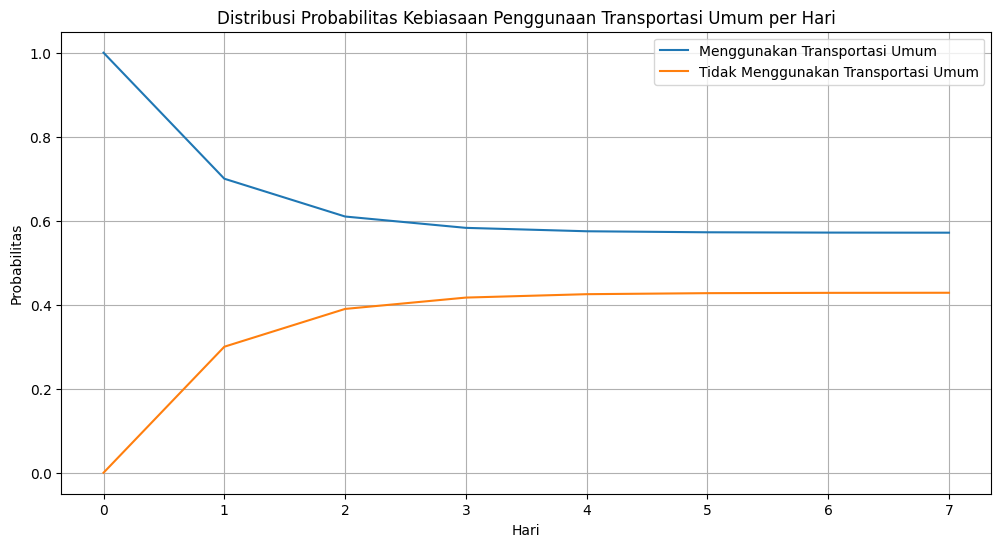

In [ ]:
plt.figure(figsize=(12, 6))
for i, state in enumerate(states):
    plt.plot(df.index, df[state], label=state)
plt.xlabel("Hari")
plt.ylabel("Probabilitas")
plt.title("Distribusi Probabilitas Kebiasaan Penggunaan Transportasi Umum per Hari")
plt.legend()
plt.grid()
plt.show()

* Membuat grafik garis untuk menunjukkan perubahan distribusi probabilitas dari masing-masing kondisi ("Menggunakan Transportasi Umum" dan "Tidak Menggunakan Transportasi Umum") setiap hari.
* Grafik ini membantu melihat bagaimana distribusi probabilitas berubah dari waktu ke waktu dan mendekati steady state.

Distribusi Steady State: [0.57142857 0.42857143]


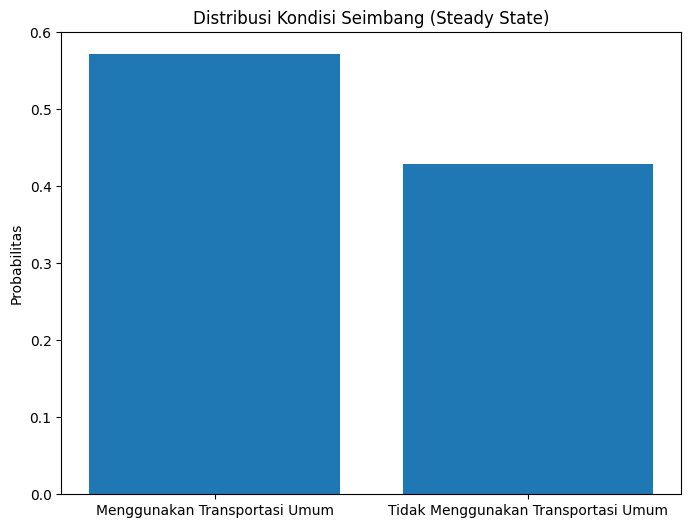

In [ ]:
print("Distribusi Steady State:", steady_state.ravel())
plt.figure(figsize=(8, 6))
plt.bar(states, steady_state.ravel())
plt.title("Distribusi Kondisi Seimbang (Steady State)")
plt.ylabel("Probabilitas")
plt.show()

* steady_state.ravel() digunakan untuk menampilkan distribusi steady state dalam bentuk array satu dimensi.
* Grafik batang menunjukkan distribusi probabilitas yang stabil dari setiap kondisi. Ini adalah probabilitas jangka panjang yang akan tercapai setelah cukup banyak iterasi.

**Kesimpulan dari Kode dan Grafik**
1. **Tabel Distribusi Probabilitas:** Tabel ini menunjukkan perubahan probabilitas untuk setiap kondisi setiap hari.
2. **Grafik Perkembangan Distribusi Tiap Hari:** Grafik ini menunjukkan perubahan probabilitas untuk masing-masing kondisi selama beberapa hari.
3. **Grafik Kondisi Seimbang (Steady State):** Grafik batang ini menunjukkan distribusi probabilitas dalam jangka panjang, di mana perubahan berhenti dan probabilitas stabil.

Setelah simulasi, grafik steady state menunjukkan bahwa setelah banyak iterasi, distribusi probabilitas dari setiap kondisi stabil.








